In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  numpy as np

In [4]:
train_data = pd.read_excel('/content/drive/MyDrive/Python_google_colab/archive (2)/default of credit card clients.xls')

In [5]:
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
train_data.shape

(30000, 25)

In [7]:
########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.7)

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6'}

In [8]:
train_data = train_data.drop(['BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6'],axis=1)

In [9]:
train_data.shape

(30000, 16)

In [10]:
import torch

X = train_data.drop(['ID','default payment next month'],axis=1)
y = train_data['default payment next month']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)




In [11]:
X_train=torch.FloatTensor(X_train_scaled).cuda()
X_test=torch.FloatTensor(X_test_scaled).cuda()
y_train= torch.LongTensor(y_train.values).cuda()
y_test=torch.LongTensor(y_test.values).cuda()

In [29]:
import torch
from torch import nn
import torchvision

class ANN_cancer(nn.Module):
  def __init__(self,input=14,hidden1=7,hidden2=3,output=2):
    super(ANN_cancer,self).__init__()
    self.FC1 = nn.Linear(input,hidden1)
    self.relu1 = nn.ReLU()
    self.FC2 = nn.Linear(hidden1,hidden2)
    self.relu2 = nn.ReLU()
    self.FC3 = nn.Linear(hidden2,output)
  def forward(self,x):
    x = self.FC1(x)
    x = self.relu1(x)
    x = self.FC2(x)
    x = self.relu2(x)
    x = self.FC3(x)
    #y_pred  = torch.sigmoid(x)
    return x

In [94]:
model1 = ANN_cancer()
loss_fn = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.05)


#from  torch.optim.lr_scheduler import LambdaLR

# Assuming optimizer has two groups.

#lambda2  = lambda epoch: 0.65 * epoch
#scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer1, lr_lambda= lambda2)

model1  = model1.cuda()

print(model1.parameters)

<bound method Module.parameters of ANN_cancer(
  (FC1): Linear(in_features=14, out_features=7, bias=True)
  (relu1): ReLU()
  (FC2): Linear(in_features=7, out_features=3, bias=True)
  (relu2): ReLU()
  (FC3): Linear(in_features=3, out_features=2, bias=True)
)>


In [95]:
epochs = 500
final_losses=[]
for i in range(epochs):
  y_pred1 = model1.forward(X_train)
  
  optimizer1.zero_grad()
  #l1 = loss_fn(y_pred1,y_train.reshape(-1,1))
  l1 = loss_fn(y_pred1,y_train)
  if i%10 == 0:
    print("Epoch number: {} and the loss : {}".format(i,l1))
  l1.backward()
  final_losses.append(l1)
  optimizer1.step()
  #scheduler.step()

Epoch number: 0 and the loss : 0.7842636704444885
Epoch number: 10 and the loss : 0.5014558434486389
Epoch number: 20 and the loss : 0.4901418387889862
Epoch number: 30 and the loss : 0.4855024516582489
Epoch number: 40 and the loss : 0.47901028394699097
Epoch number: 50 and the loss : 0.46312040090560913
Epoch number: 60 and the loss : 0.45136481523513794
Epoch number: 70 and the loss : 0.44705328345298767
Epoch number: 80 and the loss : 0.44507622718811035
Epoch number: 90 and the loss : 0.4438835084438324
Epoch number: 100 and the loss : 0.44284147024154663
Epoch number: 110 and the loss : 0.4419374167919159
Epoch number: 120 and the loss : 0.4411226212978363
Epoch number: 130 and the loss : 0.4403005540370941
Epoch number: 140 and the loss : 0.4395134747028351
Epoch number: 150 and the loss : 0.4389455020427704
Epoch number: 160 and the loss : 0.4383510649204254
Epoch number: 170 and the loss : 0.437748521566391
Epoch number: 180 and the loss : 0.4373990297317505
Epoch number: 190 

Text(0.5, 0, 'Epoch')

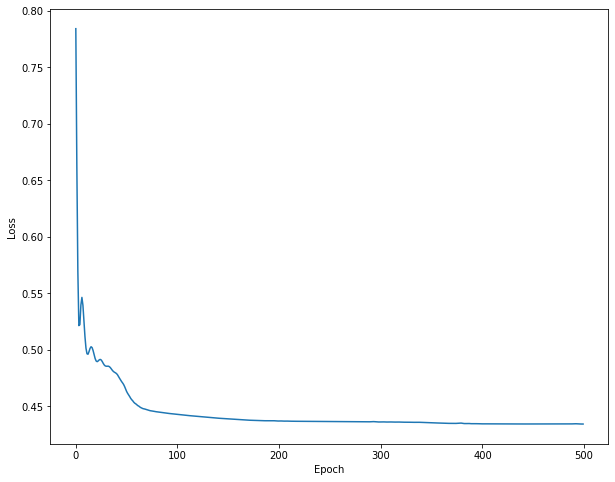

In [96]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [97]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred12=model1(data)
        predictions.append(y_pred12.argmax().item())




y_test1 = y_test.cpu().numpy()
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,predictions)
print("cm\n" , cm)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test1,predictions)
print("score", score)

cm
 [[6696  337]
 [1281  686]]
score 0.8202222222222222
